# CoolProp Introduction
This is a dedicated file to look at functionality of CoolProp

In [6]:
from CoolProp.CoolProp import PropsSI

In [7]:
coolant_name = "NITROUSOXIDE"
T = 300 # K
p = 2.758e+6 # Pa

In [9]:
print("Density of coolant:", PropsSI("DMASS", "T", T, "P", p, coolant_name))

Density of coolant: 58.20508464134267


In [10]:

'''
# Set up the coolant transport properties - let's say this engine is water cooled
def Pr_coolant(T, p):
    return PropsSI("PRANDTL", "T", T, "P", p, "WATER")

def mu_coolant(T, p):
    return PropsSI("VISCOSITY", "T", T, "P", p, "WATER")

def k_coolant(T, p):
    return PropsSI("CONDUCTIVITY", "T", T, "P", p, "WATER")

def cp_coolant(T, p):
    return PropsSI("CPMASS", "T", T, "P", p, "WATER")

def rho_coolant(T, p):
    return PropsSI("DMASS", "T", T, "P", p, "WATER") 
'''

'\n# Set up the coolant transport properties - let\'s say this engine is water cooled\ndef Pr_coolant(T, p):\n    return PropsSI("PRANDTL", "T", T, "P", p, "WATER")\n\ndef mu_coolant(T, p):\n    return PropsSI("VISCOSITY", "T", T, "P", p, "WATER")\n\ndef k_coolant(T, p):\n    return PropsSI("CONDUCTIVITY", "T", T, "P", p, "WATER")\n\ndef cp_coolant(T, p):\n    return PropsSI("CPMASS", "T", T, "P", p, "WATER")\n\ndef rho_coolant(T, p):\n    return PropsSI("DMASS", "T", T, "P", p, "WATER") \n'

### Comparison of Cantera vs CoolProp

In [31]:
import cantera as ct
# Set up the coolant transport properties using Cantera
coolant = ct.Solution('gri30.yaml')
coolant.TPY = 298.15, p, "N2O:1" # defining starting conditions for coolant to be at chamber pressure and standard ambient temperature

def rho_coolant_can(Ti, p):
    coolant.TP = Ti, p
    return coolant.density_mass

def rho_coolant_cool(Ti, p):
    return PropsSI("DMASS", "T", Ti, "P", p, coolant_name)

def cp_coolant_can(Ti, p):
    return PropsSI("CPMASS", "T", Ti, "P", p, coolant_name)

def cp_coolant_cool(Ti, p):
    coolant.TP = Ti, p
    return coolant.cp * coolant.viscosity / coolant.thermal_conductivity


rho_can = list()
rho_cool = list()

cp_can = list()
cp_cool = list()

T_list = range(300)[200:]
for i in T_list:
    rho_can.append(rho_coolant_can(i, p))
    rho_cool.append(rho_coolant_cool(i, p))
    cp_can.append(cp_coolant_can(i, p))
    cp_cool.append(cp_coolant_cool(i, p))

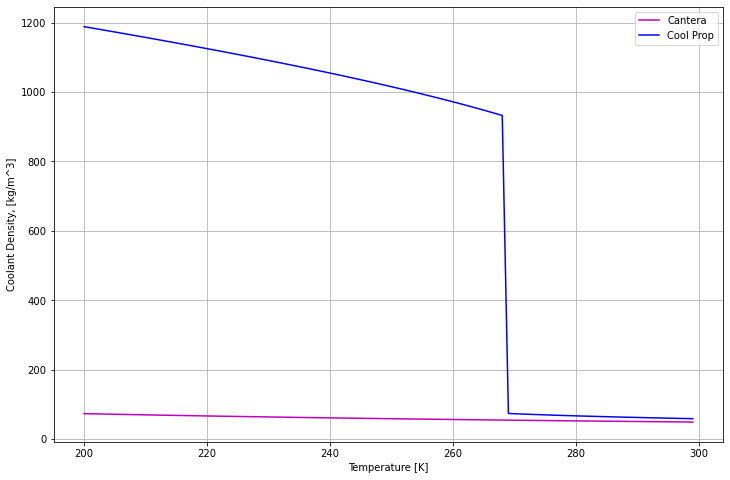

In [32]:
import os
import matplotlib.pyplot as plt
folder = "canteraplots/"
if not os.path.exists(folder):
        os.mkdir(folder)

# Plot results
fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, rho_can, color="m", label="Cantera")
plt.plot(T_list, rho_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("Coolant Density, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)

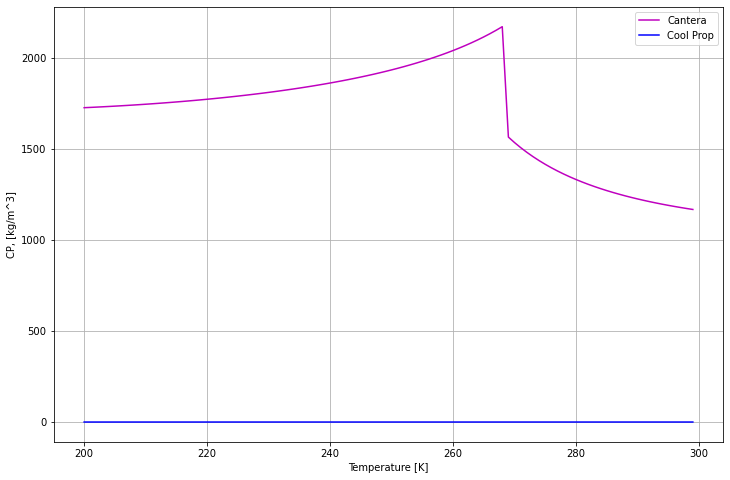

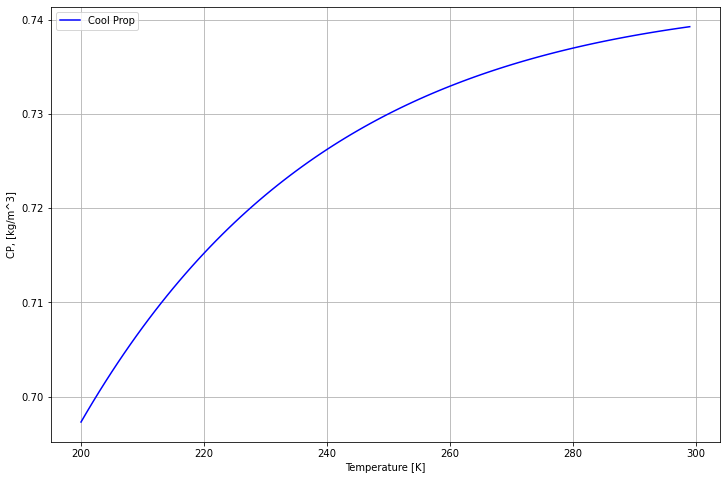

In [34]:
# Plot results
fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, cp_can, color="m", label="Cantera")
plt.plot(T_list, cp_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("CP, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)

fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, cp_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("CP, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)